In [1]:
import sys
sys.path.append('/Users/schoens/Documents/Projekte/Econ/Code/v3/')

import pandas as pd
import numpy as np

from pathlib import Path
import config.settings as cset

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
gdp_df   = pd.read_csv(cset.file_burke).loc[:, ['iso', 'scen', 'run', 'year', 'diff_SSP2', 'SSP2', 'SSP2_clim']]
gdp_df   = gdp_df[gdp_df.scen != 'Ref_1p5']
gdp_df.loc[gdp_df.scen == 'Refv2', 'scen'] = 'Ref'

In [3]:
import geopandas as gpd 
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.loc[world.name == 'France', 'iso_a3'] = 'FRA'
world.loc[world.name == 'Norway', 'iso_a3'] = 'NOR'
world.index = world.iso_a3

In [4]:
gdp_ref_df = gdp_df.loc[(gdp_df.year == 2100) & ((gdp_df.scen == 'Ref')), ['iso', 'diff_SSP2', 'SSP2', 'SSP2_clim']].groupby('iso').mean()
gdp_neg_df = gdp_df.loc[(gdp_df.year == 2100) & ((gdp_df.scen == 'Neg')), ['iso', 'diff_SSP2', 'SSP2', 'SSP2_clim']].groupby('iso').mean()

In [5]:
for iso in gdp_ref_df.index: 
    world.loc[iso, 'gdp_ref'] = gdp_ref_df.loc[iso, 'SSP2_clim']
    world.loc[iso, 'gdp_neg'] = gdp_neg_df.loc[iso, 'SSP2_clim']
world['SSP_ref-neg'] = world.gdp_neg/world.gdp_ref

/var/folders/ct/sv7_xh9x0bn978n81q83b5tr0000gp/T/ipykernel_38367/1968801881.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('coolwarm_r').copy()
/Users/schoens/opt/anaconda3/envs/py39_mesmer-m/lib/python3.9/site-packages/geopandas/plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


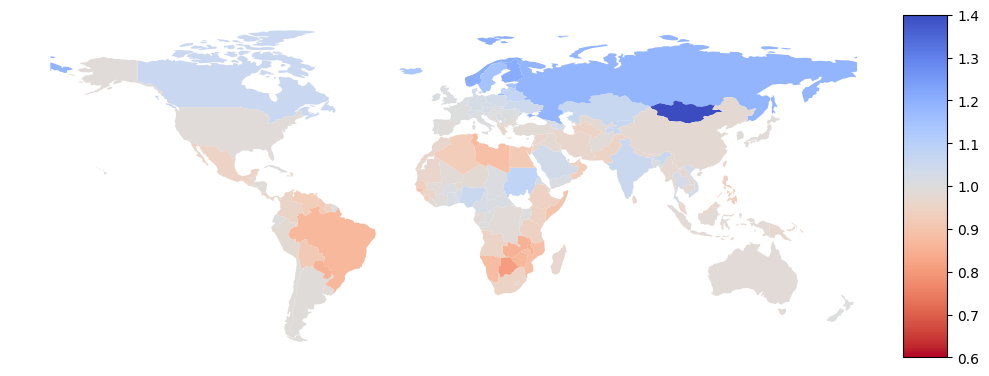

In [6]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(ncols=1,nrows=1, figsize = (10,6))

divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)

cmap = plt.cm.get_cmap('coolwarm_r').copy()
# cmap.set_under('lightgrey', 1)
# cmap.set_bad('lightgrey', 1)
world.plot(column = 'SSP_ref-neg', ax=ax, legend=True, cmap = cmap, cax=cax, vmin = 0.6, vmax = 1.4)
# cax.set_yticks([1,2,3,4,5])
# cax.set_yticklabels(scenarios)
# cbar.set_label('Percentage of runs in category')
ax.set_axis_off()
plt.tight_layout()
plt.show()

In [7]:
def q1(x):
    return x.quantile(0.1)

def q9(x):
    return x.quantile(0.9)

def q05(x):
    return x.quantile(0.05)

def q95(x):
    return x.quantile(0.95)

In [8]:
# derive differences
gdp_ref = gdp_df[gdp_df.scen == 'Ref'].copy()
gdp_neg = gdp_df[gdp_df.scen == 'Neg'].copy()

In [12]:
# derive timeseries of of 10th, median and 90th percentile: 
f = {'diff_SSP2': ['median', 'std', q1, q9, q05, q95]}
gdp_ref_agg = gdp_ref.loc[:, ['year', 'diff_SSP2']].groupby('year').agg(f).loc[:, 'diff_SSP2'].copy()
gdp_neg_agg = gdp_neg.loc[:, ['year', 'diff_SSP2']].groupby('year').agg(f).loc[:, 'diff_SSP2'].copy()

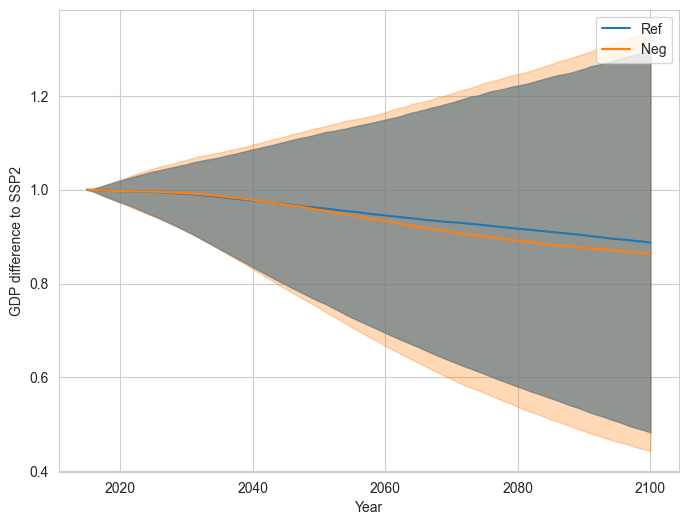

In [10]:
with sns.axes_style('whitegrid'):
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    gdp_ref_agg.loc[:, 'median'].plot(ax=ax, label='Ref', color='C0')
    gdp_neg_agg.loc[:, 'median'].plot(ax=ax, label='Neg', color='C1')
    ax.fill_between(gdp_ref_agg.index, gdp_ref_agg.loc[:, 'q1'], gdp_ref_agg.loc[:, 'q9'], color='C0', alpha=0.7)
    ax.fill_between(gdp_neg_agg.index, gdp_neg_agg.loc[:, 'q1'], gdp_neg_agg.loc[:, 'q9'], color='C1', alpha=0.3)
    ax.set_xlabel('Year')
    ax.set_ylabel('GDP difference to SSP2')
    ax.legend()
    plt.show()

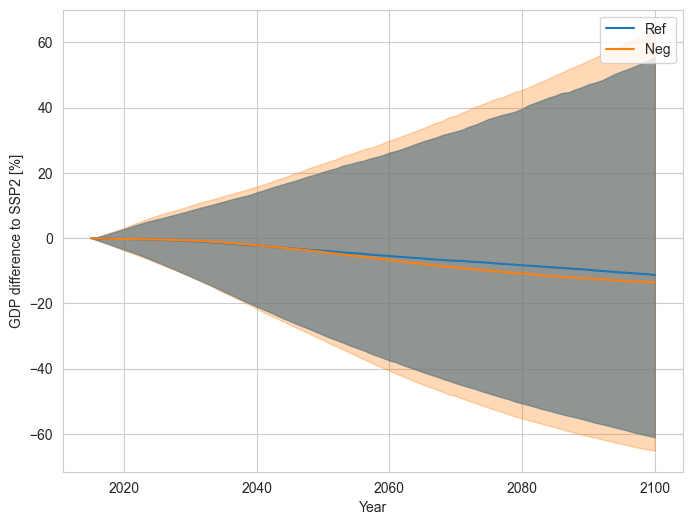

In [15]:

# f = {'diff_SSP2': ['median', 'std', q1, q9, q05, q95]}
# gdp_ref_agg = np.log(gdp_ref.loc[:, ['year', 'diff_SSP2']].groupby('year').agg(f).loc[:, 'diff_SSP2'].copy())
# gdp_neg_agg = np.log(gdp_neg.loc[:, ['year', 'diff_SSP2']].groupby('year').agg(f).loc[:, 'diff_SSP2'].copy())
with sns.axes_style('whitegrid'):
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    ((gdp_ref_agg.loc[:, 'median']-1)*100).plot(ax=ax, label='Ref', color='C0')
    ((gdp_neg_agg.loc[:, 'median']-1)*100).plot(ax=ax, label='Neg', color='C1')
    ax.fill_between(gdp_ref_agg.index, (gdp_ref_agg.loc[:, 'q05']-1)*100, (gdp_ref_agg.loc[:, 'q95']-1)*100, color='C0', alpha=0.7)
    ax.fill_between(gdp_neg_agg.index, (gdp_neg_agg.loc[:, 'q05']-1)*100, (gdp_neg_agg.loc[:, 'q95']-1)*100, color='C1', alpha=0.3)
    ax.set_xlabel('Year')
    ax.set_ylabel('GDP difference to SSP2 [%]')
    ax.legend()
    plt.show()

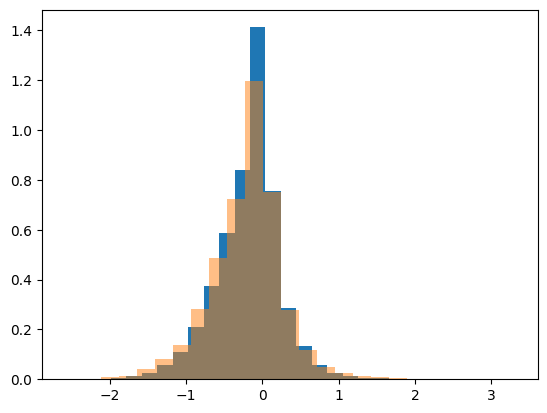

In [27]:
# plot shift function over time 
plt.figure()
plt.hist(np.log(gdp_ref[gdp_ref.year == 2100].loc[:, 'diff_SSP2'].values.flatten()), density = True, bins = 25)
plt.hist(np.log(gdp_neg[gdp_neg.year == 2100].loc[:, 'diff_SSP2'].values.flatten()), density = True, alpha = .5, bins = 25)
plt.show()
# 1 : significance testing 
# 2 : shift function 

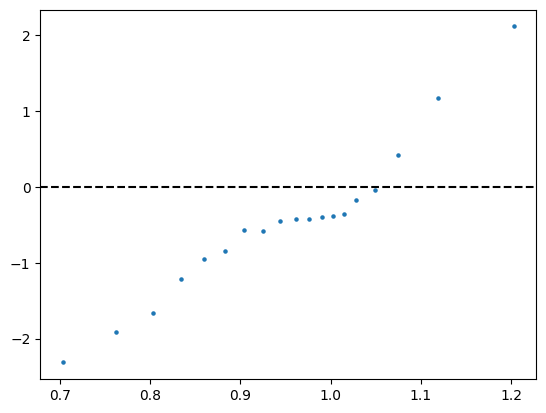

In [50]:
ref_quantiles = np.quantile(gdp_ref[gdp_ref.year == 2050].loc[:, 'diff_SSP2'].values.flatten(), q = np.arange(0.05, 1, 0.05))
neg_quantiles = np.quantile(gdp_neg[gdp_neg.year == 2050].loc[:, 'diff_SSP2'].values.flatten(), q = np.arange(0.05, 1, 0.05))
plt.figure()
plt.scatter(ref_quantiles, (neg_quantiles-ref_quantiles)/ref_quantiles*100, s = 5)
plt.axhline(0, color = 'black', linestyle = '--')
plt.show()

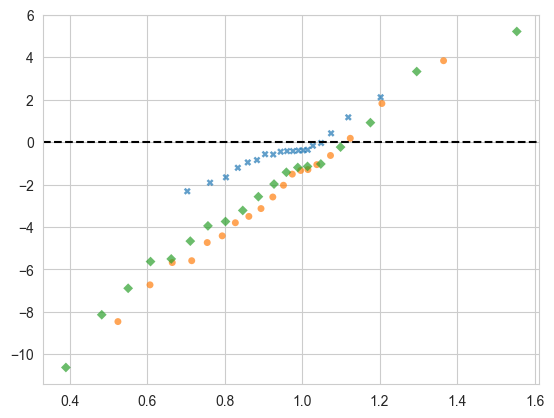

In [46]:
# ref_quantiles = np.quantile(gdp_ref[gdp_ref.year == 2100].loc[:, 'diff_SSP2'].values.reshape(157,100), q = np.arange(0.1, 1, 0.1), axis = 0).mean(axis = 1)
# neg_quantiles = np.quantile(gdp_neg[gdp_neg.year == 2100].loc[:, 'diff_SSP2'].values.reshape(157,100), q = np.arange(0.1, 1, 0.1), axis = 0).mean(axis = 1)
symbols = ['X', 'o', 'D']
with sns.axes_style('whitegrid'):
    plt.figure()
    for i, year in enumerate([2050,2075,2100]):
        ref_quantiles = np.quantile(gdp_ref[gdp_ref.year == year].loc[:, 'diff_SSP2'].values.flatten(), q = np.arange(0.05, 1, 0.05))
        neg_quantiles = np.quantile(gdp_neg[gdp_neg.year == year].loc[:, 'diff_SSP2'].values.flatten(), q = np.arange(0.05, 1, 0.05))
        plt.scatter(ref_quantiles, (neg_quantiles-ref_quantiles)/ref_quantiles*100, s = 25, marker = symbols[i], alpha  = .7, edgecolor = 'none', facecolor = 'C{}'.format(i))
    plt.axhline(0, color = 'black', linestyle = '--')
    plt.show()

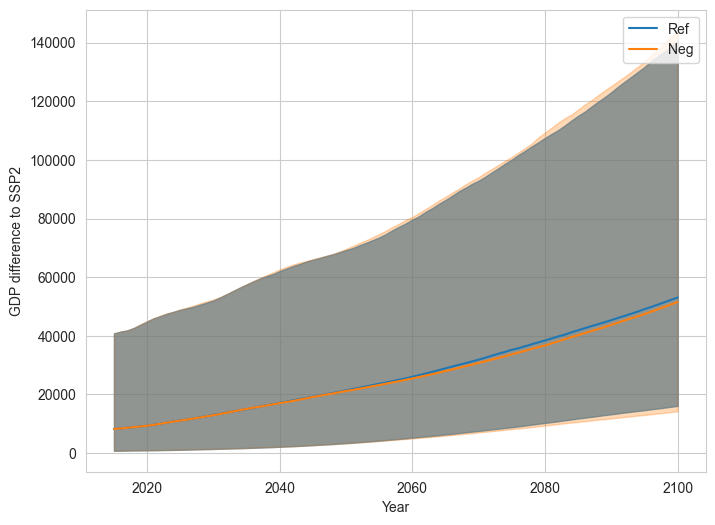

In [14]:
# derive timeseries of of 10th, median and 90th percentile: 
f = {'SSP2_clim': ['median', 'std', q1, q9, q05, q95]}
gdp_ref_agg = gdp_ref.loc[:, ['year', 'SSP2_clim']].groupby('year').agg(f).loc[:, 'SSP2_clim'].copy()
gdp_neg_agg = gdp_neg.loc[:, ['year', 'SSP2_clim']].groupby('year').agg(f).loc[:, 'SSP2_clim'].copy()

with sns.axes_style('whitegrid'):
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    gdp_ref_agg.loc[:, 'median'].plot(ax=ax, label='Ref', color='C0')
    gdp_neg_agg.loc[:, 'median'].plot(ax=ax, label='Neg', color='C1')
    ax.fill_between(gdp_ref_agg.index, gdp_ref_agg.loc[:, 'q05'], gdp_ref_agg.loc[:, 'q95'], color='C0', alpha=0.7)
    ax.fill_between(gdp_neg_agg.index, gdp_neg_agg.loc[:, 'q05'], gdp_neg_agg.loc[:, 'q95'], color='C1', alpha=0.3)
    ax.set_xlabel('Year')
    ax.set_ylabel('GDP difference to SSP2')
    ax.legend()
    plt.show()

In [10]:
gdp_ref_agg

,median,std,q1,q9,q05,q95
year,,,,,,
2015,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
2016,0.999436,0.002846,0.996050,1.001983,0.993381,1.003197
2017,0.998611,0.006929,0.990158,1.006127,0.986207,1.009412
2018,0.997940,0.011051,0.984200,1.010643,0.979149,1.015635
2019,0.997505,0.015174,0.978836,1.014973,0.971717,1.021737
...,...,...,...,...,...,...
2096,0.884750,0.470807,0.476217,1.277764,0.386434,1.525730
2097,0.883567,0.480936,0.471212,1.282168,0.381614,1.535186
2098,0.882323,0.491134,0.466352,1.284967,0.377513,1.543246


In [5]:
gmt_df = pd.read_csv(cset.path_MESMER_char / f'gmt-var_dataset.csv', index_col = 0)

In [7]:
gmt_cum = gmt_df.sum(axis = 0)

In [8]:
gmt_cum

ssp119_1      112.600990
ssp119_2      122.537438
ssp119_3      121.600023
ssp119_4      117.071881
ssp119_5      102.777512
                 ...    
CurPol_96     154.317988
CurPol_97     159.831508
CurPol_98     175.842279
CurPol_99     179.640342
CurPol_100    171.700520
Length: 1000, dtype: float64

In [12]:
plt.figure()
plt.hist(gmt_cum.loc[gmt_cum.index.str.contains('Ref')], bins = 20, alpha = .5)
plt.axvline(gmt_cum.loc[gmt_cum.index.str.contains('Ref')].mean(), color = 'C0')
plt.hist(gmt_cum.loc[gmt_cum.index.str.contains('Neg')], bins = 20, alpha = .5)
plt.axvline(gmt_cum.loc[gmt_cum.index.str.contains('Neg')].mean(), color = 'C1')
plt.show()

NameError: name 'gmt_cum' is not defined

<Figure size 640x480 with 0 Axes>